In [7]:
from skimage import io
import numpy
import cv2
%pylab
%matplotlib inline

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


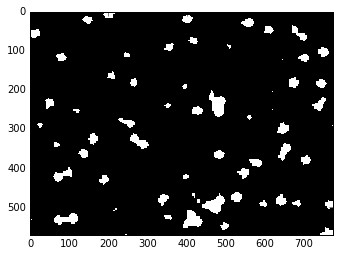

In [8]:
dst=io.imread("/home/cesar/Desktop/1.png")
io.imshow(dst)


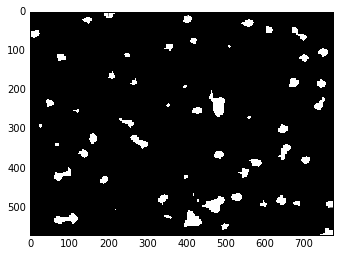

In [9]:
kernel = np.ones((3, 3), np.uint8)
dilation = cv2.dilate(dst,kernel,iterations = 2)
erosion = cv2.erode(dilation,kernel,iterations = 3)
io.imshow(erosion)

In [11]:
mask=np.uint8(erosion)
im= 255-mask
#find all your connected components (white blobs in your image)
nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(im, connectivity=8)
#connectedComponentswithStats yields every seperated component with information on each of them, such as size
#the following part is just taking out the background which is also considered a component, but most of the time we don't want that.


# minimum size of particles we want to keep (number of pixels)
#here, it's a fixed value, but you can set it as you want, eg the mean of the sizes or whatever
min_size = 150  

#your answer image
img2 = np.zeros((output.shape))
#for every component in the image, you keep it only if it's above min_size
for i in range(0, nb_components):
    if sizes[i] >= min_size:
        img2[output == i + 1] = 255
        
io.imshow(img2)

error: /io/opencv/modules/imgproc/src/connectedcomponents.cpp:3932: error: (-215) L.channels() == 1 && I.channels() == 1 in function connectedComponents_sub1
